In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 99% 651M/658M [00:09<00:00, 54.1MB/s]
100% 658M/658M [00:09<00:00, 74.6MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantdisease.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
image_size = (224, 224)

# Load the dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plantvillage/PlantVillage',
    batch_size=32,
    image_size=image_size,
    validation_split=0.2,
    subset="training",
    seed=1337
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plantvillage/PlantVillage',
    batch_size=32,
    image_size=image_size,
    validation_split=0.2,
    subset="validation",
    seed=1337
)

Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.


In [8]:
print("Training Dataset Class Labels:",train_ds.class_names)
print("Validation Dataset Class Labels:", validation_ds.class_names)

Training Dataset Class Labels: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Validation Dataset Class Labels: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [9]:
# CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [12]:
learning_rate=0.0001
num_epochs=10
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
516/516 [==============================] - 49s 82ms/step - loss: 1.1882 - accuracy: 0.6422 - val_loss: 0.7009 - val_accuracy: 0.7696
Epoch 2/10
516/516 [==============================] - 42s 80ms/step - loss: 0.6083 - accuracy: 0.8086 - val_loss: 0.4969 - val_accuracy: 0.8437
Epoch 3/10
516/516 [==============================] - 42s 80ms/step - loss: 0.3943 - accuracy: 0.8750 - val_loss: 0.3984 - val_accuracy: 0.8725
Epoch 4/10
516/516 [==============================] - 43s 83ms/step - loss: 0.2864 - accuracy: 0.9064 - val_loss: 0.5102 - val_accuracy: 0.8503
Epoch 5/10
516/516 [==============================] - 43s 82ms/step - loss: 0.2190 - accuracy: 0.9291 - val_loss: 0.4041 - val_accuracy: 0.8815
Epoch 6/10
516/516 [==============================] - 41s 79ms/step - loss: 0.1832 - accuracy: 0.9414 - val_loss: 0.4495 - val_accuracy: 0.8798
Epoch 7/10
516/516 [==============================] - 41s 78ms/step - loss: 0.1628 - accuracy: 0.9491 - val_loss: 0.3651 - val_accuracy:

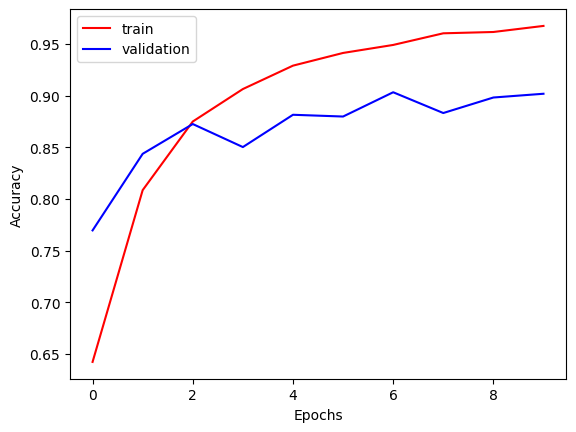

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

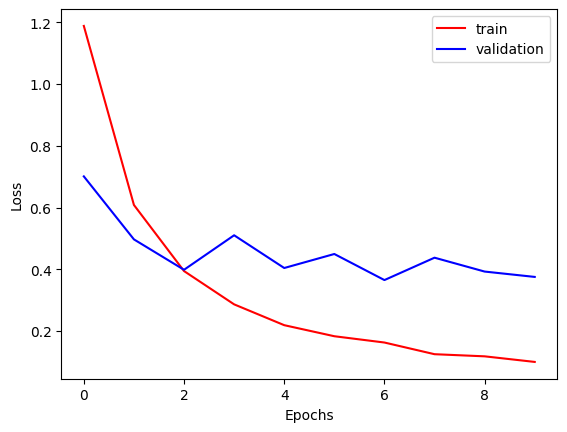

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_ds)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
129/129 [==============================] - 6s 47ms/step - loss: 0.3753 - accuracy: 0.9019
Test Accuracy: 90.18657803535461


In [17]:
import cv2

In [20]:
test_img = cv2.imread('/content/Pepper_healthy.webp')

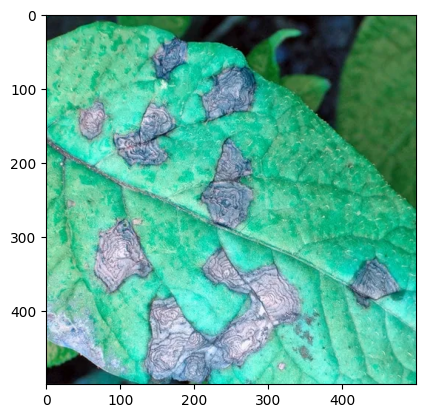

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(500, 500, 3)

In [23]:
test_img = cv2.resize(test_img,(224,224))

In [24]:
test_input = test_img.reshape((1,224,224,3))

1/1 [==============================] - 0s 406ms/step
Probability Matrix:
[[7.33346071e-19 9.99983549e-01 1.17781765e-25 1.51086363e-28
  2.76805834e-21 6.97490364e-34 6.18309022e-15 1.14756290e-23
  5.15756528e-28 1.64527828e-05 2.39943798e-24 1.57563457e-21
  3.00591699e-34 1.95661044e-23 9.60700104e-22]]


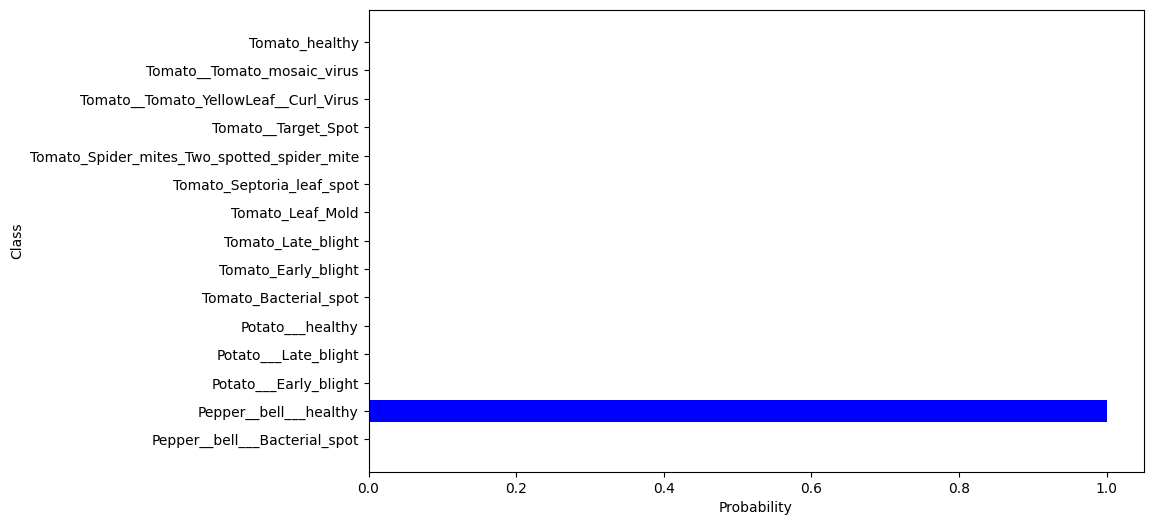

In [25]:
import numpy as np

result_array = np.array(model.predict(test_input), dtype=float)

print("Probability Matrix:")
print(result_array)

num_samples, num_classes = result_array.shape
class_names = validation_ds.class_names
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(np.arange(num_classes), result_array[0], color='b')
ax.set_yticks(np.arange(num_classes))
ax.set_yticklabels(class_names)

plt.xlabel('Probability')
plt.ylabel('Class')

plt.show()


In [26]:
import numpy as np
import os

def get_predicted_class(predicted_probabilities, class_names):
    predicted_class_index = np.argmax(predicted_probabilities, axis=-1)
    predicted_class_name = class_names[predicted_class_index[0]]
    return predicted_class_name

def get_class_names(dataset_directory):
    class_names = sorted(os.listdir(dataset_directory))
    return class_names

dataset_directory = '/content/plantvillage/PlantVillage'
class_names = get_class_names(dataset_directory)
predicted_probabilities = model.predict(test_input)
predicted_class = get_predicted_class(predicted_probabilities, class_names)

print("Predicted Class Name:", predicted_class)


1/1 [==============================] - 0s 18ms/step
Predicted Class Name: Pepper__bell___healthy
